## Importing required Packages/Libraries

In [4]:
! pip install geoplot
!pip install geodatasets
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from folium.plugins import MarkerCluster
import geopandas
import geoplot
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from geodatasets import get_path
from shapely.geometry import Point
import folium

In [5]:
import geopandas.tools as gplt
import plotly.express as px
import geoplot as gplt
import geoplot.crs as gcrs

## Display the rows in Dataset to observe the details needed

In [7]:
data=pd.read_excel("NYPD.xlsx")
data.head(10)

ARREST_KEY ARREST_DATE               PD_DESC             OFNS_DESC  \
0   232953803  08/31/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
1   234049375  09/25/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
2   234049373  09/25/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
3   234049370  09/25/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
4   233708872  09/17/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
5   232507300  08/20/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
6   232679301  08/24/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
7   234049372  09/25/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
8   234049377  09/25/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   
9   232722852  08/25/2021  ACCOSTING,FRAUDULENT  FRAUDULENT ACCOSTING   

  AGE_GROUP PERP_SEX       PERP_RACE   Latitude  Longitude  Month  \
0     45-64        M           BLACK  40.752863 -73.992981      8   
1     45-64        M           BLACK  40.750669 -73.987781      9   
2     45-64        M           BLACK  40.750669 -73.987781      9   
3     25-44        M           BLACK  40.750669 -73.987781      9   
4     45-64        M           BLACK  40.747170 -73.988380      9   
5     25-44        M  BLACK HISPANIC  40.764121 -73.988497      8   
6     45-64        M           BLACK  40.756555 -73.992147      8   
7       65+        M           WHITE  40.750669 -73.987781      9   
8     25-44        M           BLACK  40.750669 -73.987781      9   
9     25-44        M  WHITE HISPANIC  40.806508 -73.927739      8   

   Age_group_value  SEX_VALUE  off_desc_value  PREP_SEX_VALUE  PERP_RACE_VALUE  
0                4          1              15               1                7  
1                4          1              15               1                7  
2                4          1              15               1                7  
3                5          1              15               1                7  
4                4          1              15               1                7  
5                5          1              15               1                4  
6                4          1              15               1                7  
7                1          1              15               1                5  
8                5          1              15               1                7  
9                5          1              15               1                6

## Number of offences committed in Dataset

In [8]:
data['PD_DESC'].value_counts()

ASSAULT 3                         14678
LARCENY,PETIT FROM OPEN AREAS,     9110
ASSAULT 2,1,UNCLASSIFIED           8591
ROBBERY,OPEN AREA UNCLASSIFIED     5678
PUBLIC ADMINISTRATION,UNCLASSI     5256
                                  ...  
SEXUAL MISCONDUCT,DEVIATE             1
EAVESDROPPING                         1
SOLICITATION 4, CRIMINAL              1
STOLEN PROPERTY 2,POSSESSION B        1
WEAPONS,PROHIBITED USE IMITATI        1
Name: PD_DESC, Length: 233, dtype: int64

## Basic layout of New York Boroughs for Visualization

<GeoAxes: >

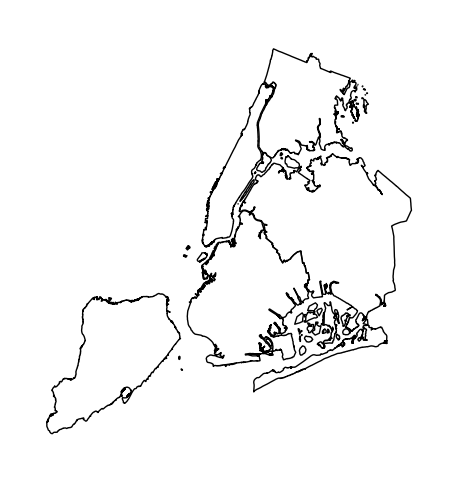

In [9]:
warnings.filterwarnings('ignore')
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs'))

boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())

## Discrete map to identify different boroughs

In [10]:


# Read world and boroughs data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs'))


# Plot New York City boroughs interactively
fig = px.choropleth(boroughs, geojson=boroughs.geometry, title="New York City Boroughs", locations=boroughs.index, color=boroughs.index,
                    color_continuous_scale='Viridis', color_discrete_map=None, labels=None,
                    width=1200, height=800)
fig.update_geos(
    center=dict(lon=-74, lat=40.7),
    projection_scale=300,
)
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    ),
)
fig.show()


## Observations of crimes committed according to specific month

In [11]:


# Suppress warnings
warnings.filterwarnings('ignore')

# Read NYPD data
data = pd.read_excel("NYPD.xlsx")

# Plot CRIMES OVER MONTH interactively
month_counts = data.Month.value_counts().reset_index()
month_counts.columns = ["Month", "Count"]
fig = px.bar(month_counts, x="Month", y="Count", title="Monthly Crimes", color="Month")
fig.update_xaxes(title_text="MONTH")
fig.update_yaxes(title_text="Number of Crimes")
fig.show()



## Crimes committed by different age groups

In [12]:
# @title
# Count and plot AGE_GROUP value counts with a gradient color within each bar
age_group_counts = data.AGE_GROUP.value_counts().reset_index()
age_group_counts.columns = ["Age Group", "Count"]
fig = px.bar(
    age_group_counts,
    x="Age Group",
    y="Count",
    title="Demographics of Incidents",
    color="Age Group",
    color_continuous_scale="Viridis"
)
fig.update_xaxes(title_text="AGE GROUP")
fig.update_yaxes(title_text="Number of Crimes")
fig.show()



## Comparision used to diaply the number of arrests in month to according to the crimes committed

In [13]:
# @title
# Create a DataFrame with the count of arrests per month
monthly_counts = data['Month'].value_counts().reset_index()
monthly_counts.columns = ["Month", "Count"]

# Create a line plot for monthly trends in arrests
fig = px.line(monthly_counts, x="Month", y="Count", title="Arrests Over Time", labels={"Month": "Month", "Count": "Number of Arrests"})
fig.show()

## Display the number of crimes according to the each category

In [14]:
# Plot Categorical Graph of Offenses interactively
offenses_counts = data.OFNS_DESC.value_counts().reset_index()
offenses_counts.columns = ["Offense", "Count"]
fig = px.bar(offenses_counts, x="Offense", y="Count", title="Categorical Count Graph", color="Offense")
fig.update_xaxes(title_text="Offenses")
fig.update_yaxes(title_text="Number of Criminals")
fig.show()

## Box Plot of age group and Latitude distribution

In [15]:
# Convert the Seaborn plot to Plotly
fig = go.Figure(data=[go.Box(x=data['AGE_GROUP'], y=data['Latitude'])])
fig.update_layout(
    title='Boxplot of Latitude Distribution by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Latitude'
)
fig.show()

## Displaying the weights by relating the factors in dataset using Correlation Heatmap

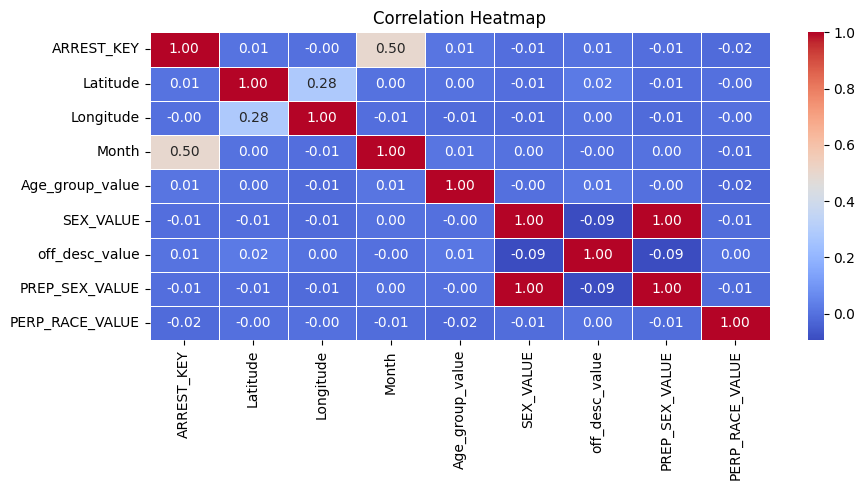

In [16]:
# Create a correlation matrix heatmap
numerical_columns = data.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Extracting the Geometry data from dataset

In [17]:
# @title

data=pd.read_excel("NYPD.xlsx")

long_lat=["Longitude","Latitude"]
df = pd.DataFrame(data, columns=long_lat)
print(df)

geometry = data.apply(
    lambda srs: Point(float(srs['Longitude']), float(srs['Latitude'])),
    axis='columns'
)
geometry

nyc_new = gpd.GeoDataFrame(data, geometry=geometry)
nyc_new.to_excel('GEOMETRY.xlsx', index=False)

        Longitude   Latitude
0      -73.992981  40.752863
1      -73.987781  40.750669
2      -73.987781  40.750669
3      -73.987781  40.750669
4      -73.988380  40.747170
...           ...        ...
115233 -73.942361  40.798944
115234 -73.885518  40.870193
115235 -73.854852  40.902205
115236 -73.976051  40.751450
115237 -73.983586  40.741109

[115238 rows x 2 columns]


Map displaying the New York map using gender and age_group of crimes committed

In [18]:
from shapely.geometry import Point

geometry = data.apply(
    lambda srs: Point(float(srs['Longitude']), float(srs['Latitude'])),
    axis='columns'
)
geometry

new=["ARREST_KEY","geometry"]
df = pd.DataFrame(data, columns=new)

new=["geometry"]
df = pd.DataFrame(data, columns=new)

topGender=data[(data["PERP_SEX"] == "M")] #Top Gender
topAgeGroup=data[(data["AGE_GROUP"] == "25-44")] #Top Age Group
nyc_ageGroup=gpd.GeoDataFrame(topAgeGroup, geometry=geometry)
nyc_gender=gpd.GeoDataFrame(topGender, geometry=geometry)

<GeoAxes: >

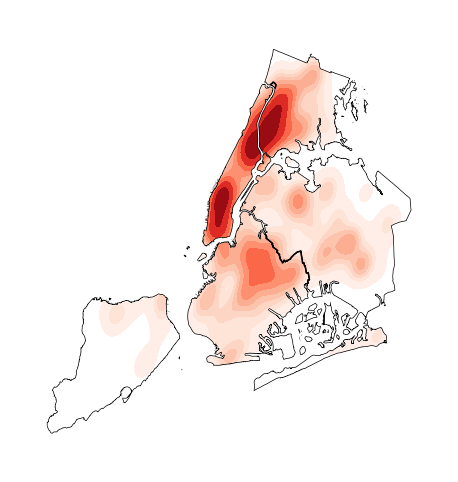

In [19]:
ax = geoplot.kdeplot(
    nyc_gender, clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

<GeoAxes: >

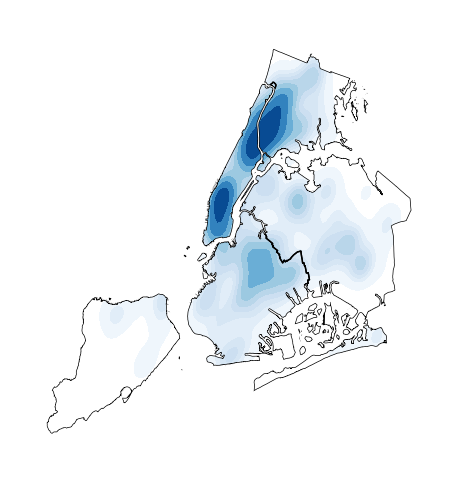

In [20]:
ax = geoplot.kdeplot(
    nyc_ageGroup, clip=boroughs.geometry,
    shade=True, cmap='Blues',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

## Interactive map implementation from same concept involved in static map

In [21]:
# @title
# Create a GeoDataFrame from NYPD data and save it to an Excel file
long_lat = ["Longitude", "Latitude"]
geometry = data.apply(lambda srs: Point(float(srs['Longitude']), float(srs['Latitude'])), axis='columns')
nyc_new = gpd.GeoDataFrame(data, geometry=geometry)

# Save the new GeoDataFrame to an Excel file
nyc_new.to_excel('GEOMETRY.xlsx', index=False)

# Plot KDE plot of crimes interactively
fig = px.density_mapbox(
    nyc_new, lat='Latitude', lon='Longitude',
    radius=10, center=dict(lon=-74, lat=40.7),
    zoom=8, mapbox_style="carto-positron",
    title="Density Mapbox Plot"
)
fig.show()



## Extracting the co-ordinates as HTML file

In [ ]:
# Replace 'your_dataset.xlsx' with the actual file path of your Excel file
df = pd.read_excel('NYPD.xlsx')

# Create a GeoDataFrame from the DataFrame
geometry = [Point(lon, lat) for lat, lon in zip(df['Latitude'], df['Longitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create a map centered around New York City
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Define colors for each age group
colors = {'65+': 'red', '25-44': 'blue', '18-24': 'green', '45-64': 'purple', '<18': 'orange'}

# Create a MarkerCluster layer for better performance
marker_cluster = MarkerCluster().add_to(ny_map)

# Iterate through the GeoDataFrame and add colored markers to the map
for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Age Group: {row['AGE_GROUP']}",
        icon=folium.Icon(color=colors[row['AGE_GROUP']])
    ).add_to(marker_cluster)

# Display the map
ny_map.save('Visualization_Output.html')